In [14]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [5]:
from sklearn.datasets import fetch_california_housing

data =fetch_california_housing()

df = pd.DataFrame(data.data,columns=data.feature_names)
df['Price']=data.target

print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  ...  AveOccup  Latitude  Longitude  Price
0  8.3252      41.0  6.984127   1.023810  ...  2.555556     37.88    -122.23  4.526
1  8.3014      21.0  6.238137   0.971880  ...  2.109842     37.86    -122.22  3.585
2  7.2574      52.0  8.288136   1.073446  ...  2.802260     37.85    -122.24  3.521
3  5.6431      52.0  5.817352   1.073059  ...  2.547945     37.85    -122.25  3.413
4  3.8462      52.0  6.281853   1.081081  ...  2.181467     37.85    -122.25  3.422

[5 rows x 9 columns]


In [6]:
print(df.isnull().sum())

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64


In [8]:
x=df.drop(columns=["Price"])
y=df["Price"]


In [9]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [10]:
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [11]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [13]:
y_pred = model.predict(X_test)

In [15]:
mae = mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)


print(f"Mean Absolute Error : {mae}")
print(f"Root mean squared Error:{rmse}")

Mean Absolute Error : 0.5332001304956565
Root mean squared Error:0.7455813830127764


Text(0.5, 1.0, 'actual vs predicted house price')

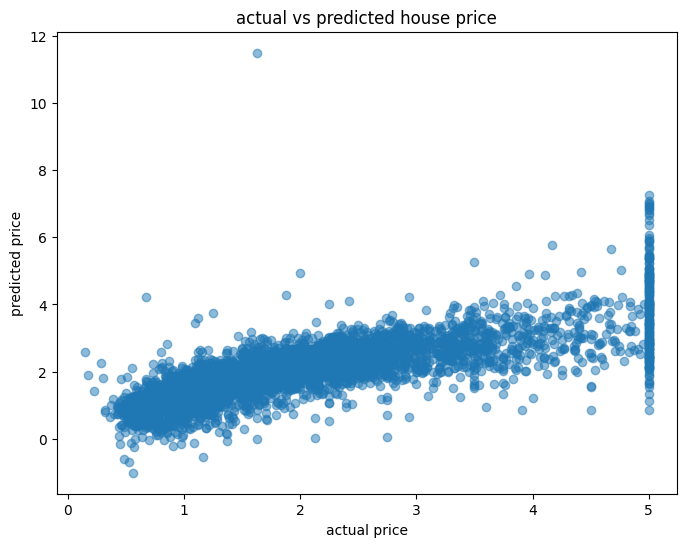

In [16]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("actual vs predicted house price")